In [5]:
import warnings

# Hide all warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install missingno;

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # Optional, but good for visualizing missing data

#   Configuration for plots  
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7) # Default figure size, adjusted for potentially more features
pd.set_option('display.max_columns', 50) # Show more columns in pandas outputs


In [8]:
#   0. Load Datasets  
try:
    df_employee = pd.read_csv('data/employee_data.csv')
    df_insurance = pd.read_csv('data/insurance_data.csv')
    df_vendor = pd.read_csv('data/vendor_data.csv')
    print("All datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading datasets: {e}")
    print("Please ensure 'employee_data.csv', 'insurance_data.csv', and 'vendor_data.csv' are in a 'data' subdirectory or adjust path.")
    exit()

All datasets loaded successfully.


## Initial Inspection: Employee Data

In [9]:
print("Shape:", df_employee.shape)

Shape: (1200, 10)


In [10]:
df_employee.head()

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER
0,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,NaN,Waterbury Center,VT,5677,34584958,HKUN51252328472585
1,AGENT00002,Angelo Borjon,2005-12-27,414 Tanya Pass,NaN,Panama City,FL,32404,107363763,OPIS19290040088204
2,AGENT00003,Candy Spellman,2003-09-02,606 National Street,#306,Fayetteville,AR,72701,81744097,YSCJ67489688482590
3,AGENT00004,Mary Smith,2004-09-23,235 Hugh Thomas Drive,NaN,Panama City,FL,32404,67563771,ZANG21285355574581
4,AGENT00005,Mildred Diaz,2011-06-21,3426 Broadview Street,NaN,Montgomery,AL,36110,114951317,DZFS82244494451134


In [11]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AGENT_ID            1200 non-null   object
 1   AGENT_NAME          1200 non-null   object
 2   DATE_OF_JOINING     1200 non-null   object
 3   ADDRESS_LINE1       1200 non-null   object
 4   ADDRESS_LINE2       179 non-null    object
 5   CITY                1193 non-null   object
 6   STATE               1200 non-null   object
 7   POSTAL_CODE         1200 non-null   int64 
 8   EMP_ROUTING_NUMBER  1200 non-null   int64 
 9   EMP_ACCT_NUMBER     1200 non-null   object
dtypes: int64(2), object(8)
memory usage: 93.9+ KB


In [12]:
print("Missing values:\n\n", df_employee.isnull().sum())


Missing values:

 AGENT_ID                 0
AGENT_NAME               0
DATE_OF_JOINING          0
ADDRESS_LINE1            0
ADDRESS_LINE2         1021
CITY                     7
STATE                    0
POSTAL_CODE              0
EMP_ROUTING_NUMBER       0
EMP_ACCT_NUMBER          0
dtype: int64


## Initial Inspection: Vendor Data

In [13]:
print("Shape:", df_vendor.shape)

Shape: (600, 7)


In [14]:
print(df_vendor.head())


   VENDOR_ID              VENDOR_NAME                   ADDRESS_LINE1  \
0  VNDR00001  King, Proctor and Jones        2027 North Shannon Drive   
1  VNDR00002               Garcia Ltd          5701 East Shirley Lane   
2  VNDR00003               Cherry LLC            1217 Cottondale Road   
3  VNDR00004              Mays-Benson  227 West Montgomery Cross Road   
4  VNDR00005               Wilson PLC            23 North Hill Street   

  ADDRESS_LINE2          CITY STATE  POSTAL_CODE  
0            #5  Fayetteville    AR        72703  
1           NaN    Montgomery    AL        36117  
2           NaN    Montgomery    AL        36109  
3          #736      Savannah    GA        31406  
4           NaN     Nashville    TN        37210  


In [15]:

df_vendor.info()
print("Missing values:\n", df_vendor.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VENDOR_ID      600 non-null    object
 1   VENDOR_NAME    600 non-null    object
 2   ADDRESS_LINE1  600 non-null    object
 3   ADDRESS_LINE2  97 non-null     object
 4   CITY           594 non-null    object
 5   STATE          600 non-null    object
 6   POSTAL_CODE    600 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.9+ KB
Missing values:
 VENDOR_ID          0
VENDOR_NAME        0
ADDRESS_LINE1      0
ADDRESS_LINE2    503
CITY               6
STATE              0
POSTAL_CODE        0
dtype: int64


## --- Initial Inspection: Insurance Data (Primary) ---

In [16]:
print("Shape:", df_insurance.shape)


Shape: (10000, 38)


In [17]:
df_insurance.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,ROUTING_NUMBER,ACCT_NUMBER,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,Christopher Demarest,7701 West Saint John Road,#2010,Glendale,AZ,85308,087-11-1946,Y,54,89,Y,3,L,Own,LI,109134974,HXJP58258181908465,Bachelor,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,Ricardo Gatlin,8595 West 81st Drive,NaN,Arvada,CO,80005,685-33-3536,N,61,80,Y,4,L,Rent,MI,40125819,JUND46859540983731,Bachelor,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,Lashawn Engles,637 Britannia Drive,NaN,Vallejo,CA,94591,378-36-0672,N,47,68,Y,6,L,Rent,MI,99513168,WGZZ90128415227650,PhD,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,Steven Bassett,2803 River Drive,NaN,Thunderbolt,GA,31404,669-92-1861,Y,36,16,Y,7,L,Mortgage,MI,18429110,WIKE91555436351397,Masters,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,Jason Rodriguez,7573 National Drive,NaN,Livermore,CA,94550,703-40-1033,Y,51,16,Y,2,M,Rent,HI,70752391,VYJW71311537294027,Masters,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [18]:
df_insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             1495 non-null   object 
 13  CITY                      9946 non-null   object 
 14  STATE  

In [19]:
print("Missing values:\n", df_insurance.isnull().sum().sort_values(ascending=False))


Missing values:
 ADDRESS_LINE2               8505
VENDOR_ID                   3245
AUTHORITY_CONTACTED         1945
CUSTOMER_EDUCATION_LEVEL     529
CITY                          54
INCIDENT_CITY                 46
RISK_SEGMENTATION              0
HOUSE_TYPE                     0
SOCIAL_CLASS                   0
ROUTING_NUMBER                 0
ACCT_NUMBER                    0
CLAIM_STATUS                   0
EMPLOYMENT_STATUS              0
INCIDENT_SEVERITY              0
ANY_INJURY                     0
POLICE_REPORT_AVAILABLE        0
INCIDENT_STATE                 0
INCIDENT_HOUR_OF_THE_DAY       0
AGENT_ID                       0
NO_OF_FAMILY_MEMBERS           0
TXN_DATE_TIME                  0
TRANSACTION_ID                 0
PREMIUM_AMOUNT                 0
CUSTOMER_ID                    0
POLICY_NUMBER                  0
POLICY_EFF_DT                  0
LOSS_DT                        0
REPORT_DT                      0
INSURANCE_TYPE                 0
CLAIM_AMOUNT              


# Data Cleaning for Insurance Data

In [20]:
# 1. Handle CLAIM_AMOUNT: It appears to have '--' which makes it an object type.
if 'CLAIM_AMOUNT' in df_insurance.columns:
    print("\nCleaning CLAIM_AMOUNT\n")
    print("Original CLAIM_AMOUNT unique values sample:", df_insurance['CLAIM_AMOUNT'].unique()[:20])
    df_insurance['CLAIM_AMOUNT'] = pd.to_numeric(df_insurance['CLAIM_AMOUNT'], errors='coerce')
    print("CLAIM_AMOUNT type after cleaning:", df_insurance['CLAIM_AMOUNT'].dtype)
    print("Missing CLAIM_AMOUNT after cleaning '--':", df_insurance['CLAIM_AMOUNT'].isnull().sum())



Cleaning CLAIM_AMOUNT

Original CLAIM_AMOUNT unique values sample: [ 9000 26000 13000 16000  3000 63000  8000  5000  4000 92000 11000 51000
   700 39000 40000 68000 17000   300 80000 10000]
CLAIM_AMOUNT type after cleaning: int64
Missing CLAIM_AMOUNT after cleaning '--': 0


In [21]:

# 2. Convert Date Columns to Datetime objects
date_cols_insurance = ['TXN_DATE_TIME', 'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT']
print("\nConverting Date Columns in Insurance Data\n")
for col in date_cols_insurance:
    if col in df_insurance.columns:
        df_insurance[col] = pd.to_datetime(df_insurance[col], errors='coerce')
        print(f"'{col}' converted to datetime. Nulls after conversion: {df_insurance[col].isnull().sum()}")

if 'DATE_OF_JOINING' in df_employee.columns:
    df_employee['DATE_OF_JOINING'] = pd.to_datetime(df_employee['DATE_OF_JOINING'], errors='coerce')
    print(f"'DATE_OF_JOINING' in employee data converted to datetime.") 


Converting Date Columns in Insurance Data

'TXN_DATE_TIME' converted to datetime. Nulls after conversion: 0
'POLICY_EFF_DT' converted to datetime. Nulls after conversion: 0
'LOSS_DT' converted to datetime. Nulls after conversion: 0
'REPORT_DT' converted to datetime. Nulls after conversion: 0
'DATE_OF_JOINING' in employee data converted to datetime.


# Merge DataFrames


In [22]:
# Merge insurance data with employee data
df_merged = pd.merge(df_insurance, df_employee, on='AGENT_ID', how='left', suffixes=('', '_emp'))
print(f"\nShape after merging with employee data: {df_merged.shape}")

# Merge the result with vendor data
df_merged = pd.merge(df_merged, df_vendor, on='VENDOR_ID', how='left', suffixes=('', '_vend'))
print(f"Shape after merging with vendor data: {df_merged.shape}")

print("\n Merged DataFrame Info ")
df_merged.info()


Shape after merging with employee data: (10000, 47)
Shape after merging with vendor data: (10000, 53)

 Merged DataFrame Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TXN_DATE_TIME             10000 non-null  datetime64[ns]
 1   TRANSACTION_ID            10000 non-null  object        
 2   CUSTOMER_ID               10000 non-null  object        
 3   POLICY_NUMBER             10000 non-null  object        
 4   POLICY_EFF_DT             10000 non-null  datetime64[ns]
 5   LOSS_DT                   10000 non-null  datetime64[ns]
 6   REPORT_DT                 10000 non-null  datetime64[ns]
 7   INSURANCE_TYPE            10000 non-null  object        
 8   PREMIUM_AMOUNT            10000 non-null  float64       
 9   CLAIM_AMOUNT              10000 non-null  int64         
 10  CUSTOMER_NAME  

In [23]:
print("Merged DataFrame Head ")
df_merged.head()

Merged DataFrame Head 


,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,SSN,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1_emp,ADDRESS_LINE2_emp,CITY_emp,STATE_emp,POSTAL_CODE_emp,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,VENDOR_NAME,ADDRESS_LINE1_vend,ADDRESS_LINE2_vend,CITY_vend,STATE_vend,POSTAL_CODE_vend
0,2020-06-01,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,Christopher Demarest,7701 West Saint John Road,#2010,Glendale,AZ,85308,087-11-1946,Y,54,89,Y,3,L,Own,LI,...,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556,Amy Wangler,1994-01-06,584 Rural Hill Road,NaN,Nashville,TN,37217,35441155,LRZO53254369804934,Ramsey Inc,3114 West 20th Court,NaN,Panama City,FL,32405.0
1,2020-06-01,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,Ricardo Gatlin,8595 West 81st Drive,NaN,Arvada,CO,80005,685-33-3536,N,61,80,Y,4,L,Rent,MI,...,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592,Jessica Montez,2004-05-28,6114 West Glenn Drive,#1,Glendale,AZ,85301,44055451,XBYG14382904542874,"Morales, Campbell and Washington",42 West Louise Street,B,Fayetteville,AR,72701.0
2,2020-06-01,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,Lashawn Engles,637 Britannia Drive,NaN,Vallejo,CA,94591,378-36-0672,N,47,68,Y,6,L,Rent,MI,...,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031,Howard Smith,2004-08-01,2500 Snowdoun Chambers Road,NaN,Montgomery,AL,36105,55770246,WRXH14597428306333,Johnson Ltd,2619 North Quality Lane,#315,Fayetteville,AR,72703.0
3,2020-06-01,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,Steven Bassett,2803 River Drive,NaN,Thunderbolt,GA,31404,669-92-1861,Y,36,16,Y,7,L,Mortgage,MI,...,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075,Patricia Tucker,2007-06-12,313 Lone Oak Drive,NaN,Norman,OK,73071,87652976,YEPN16077902472499,Blackwell-Foster,3609 Meadow Drive,NaN,Nashville,TN,37215.0
4,2020-06-01,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,Jason Rodriguez,7573 National Drive,NaN,Livermore,CA,94550,703-40-1033,Y,51,16,Y,2,M,Rent,HI,...,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472,Brenda Bean,2010-01-19,120 Wells Avenue,NaN,Glen Burnie,MD,21061,76119019,HZBK86544578578547,Evans-Scott,4001 19th Place Northeast,NaN,Washington,DC,20018.0


### PII (Personally Identifiable Information) Consideration


Columns like SSN, CUSTOMER_NAME, ADDRESS_LINE1 (from customer), EMP_ACCT_NUMBER etc. are PII.

For modeling, these should generally be dropped or securely hashed.

For EDA, we can explore them but I will be mindful.

In [24]:
pii_cols = ['CUSTOMER_NAME', 'ADDRESS_LINE1', 'ADDRESS_LINE2', # from insurance (customer part)
            'SSN', 'ROUTING_NUMBER', 'ACCT_NUMBER', # from insurance (customer part)
            'ADDRESS_LINE1_emp', 'ADDRESS_LINE2_emp', 'EMP_ROUTING_NUMBER', 'EMP_ACCT_NUMBER', # from employee
            'ADDRESS_LINE1_vend', 'ADDRESS_LINE2_vend'] # from vendor
# For now, we will keep them for EDA while we make a note.
print(f"\nIdentified PII columns (or similar sensitive): {pii_cols}")


Identified PII columns (or similar sensitive): ['CUSTOMER_NAME', 'ADDRESS_LINE1', 'ADDRESS_LINE2', 'SSN', 'ROUTING_NUMBER', 'ACCT_NUMBER', 'ADDRESS_LINE1_emp', 'ADDRESS_LINE2_emp', 'EMP_ROUTING_NUMBER', 'EMP_ACCT_NUMBER', 'ADDRESS_LINE1_vend', 'ADDRESS_LINE2_vend']


### TARGET VARIABLE IDENTIFICATION AND CREATION


THIS IS A CRITICAL STEP. As there will be a need to define target variable, 'FRAUD_FLAG'.

Based on `CLAIM_STATUS` column in `df_insurance` (now in `df_merged`).

Example: if 'F' means fraud and 'A' means approved/legitimate.

In [25]:
df_merged['CLAIM_STATUS'].unique()

array(['A', 'D'], dtype=object)

In [26]:
df_merged['CLAIM_STATUS'].value_counts()

CLAIM_STATUS
A    9497
D     503
Name: count, dtype: int64

Thoroughly Defining FRAUD_FLAG from CLAIM_STATUS

Unique values in CLAIM_STATUS:
['A' 'D']

Value counts for CLAIM_STATUS (absolute):
CLAIM_STATUS
A    9497
D     503
Name: count, dtype: int64

Value counts for CLAIM_STATUS (normalized %):
CLAIM_STATUS
A    94.97
D     5.03
Name: proportion, dtype: float64

Using the following mapping for FRAUD_FLAG: {'A': 0, 'D': 1}

No NaN values in FRAUD_FLAG after mapping. All CLAIM_STATUS values were covered by the map.

Verification of FRAUD_FLAG

Unique values in FRAUD_FLAG: [0 1]

Value counts for FRAUD_FLAG (absolute):
FRAUD_FLAG
0    9497
1     503
Name: count, dtype: int64

Value counts for FRAUD_FLAG (normalized %):
FRAUD_FLAG
0    94.97
1     5.03
Name: proportion, dtype: float64

FRAUD_FLAG seems correctly defined with two classes (0 and 1).
Percentage of fraudulent claims (FRAUD_FLAG=1): 5.03%


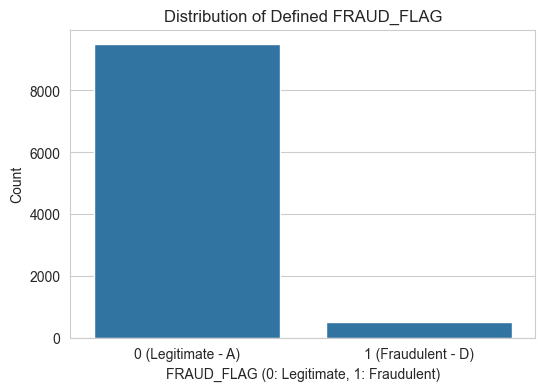

In [27]:
if 'CLAIM_STATUS' in df_merged.columns:
    print("Thoroughly Defining FRAUD_FLAG from CLAIM_STATUS")

    # Step 1: Inspect CLAIM_STATUS
    print("\nUnique values in CLAIM_STATUS:")
    unique_statuses = df_merged['CLAIM_STATUS'].unique() # Should be ['A', 'D']
    print(unique_statuses)

    print("\nValue counts for CLAIM_STATUS (absolute):")
    print(df_merged['CLAIM_STATUS'].value_counts(dropna=False)) # A: 9497, D: 503

    print("\nValue counts for CLAIM_STATUS (normalized %):")
    print(df_merged['CLAIM_STATUS'].value_counts(normalize=True, dropna=False) * 100)

    # Step 2 & 3: Domain Knowledge and Implementing Mapping
    # Based on the observed unique values: ['A', 'D']
    # 'A' (Approved) -> Legitimate (0)
    # 'D' (Denied)   -> Fraudulent (1) for the purpose of this model
    status_to_fraud_map = {
        'A': 0,  # Legitimate
        'D': 1   # Fraudulent / Suspicious (target for detection)
    }
    print(f"\nUsing the following mapping for FRAUD_FLAG: {status_to_fraud_map}")

    # Apply the mapping
    df_merged['FRAUD_FLAG'] = df_merged['CLAIM_STATUS'].map(status_to_fraud_map)

    # Step 4: Handle Unmapped Statuses (should not happen with this clear map for ['A', 'D'])
    # Check if any NaNs were produced by the map (e.g., if CLAIM_STATUS had NaNs originally)
    if df_merged['FRAUD_FLAG'].isnull().any():
        print("\nWARNING: FRAUD_FLAG contains NaN values.")
        print("This could be due to NaN values in the original CLAIM_STATUS column that were not explicitly mapped.")
        print("Original CLAIM_STATUS rows where FRAUD_FLAG is NaN:")
        print(df_merged[df_merged['FRAUD_FLAG'].isnull()]['CLAIM_STATUS'].value_counts(dropna=False))
        
    else:
        print("\nNo NaN values in FRAUD_FLAG after mapping. All CLAIM_STATUS values were covered by the map.")


    # Step 5: Verify FRAUD_FLAG
    if 'FRAUD_FLAG' in df_merged.columns:
        print("\nVerification of FRAUD_FLAG\n")
        print("Unique values in FRAUD_FLAG:", df_merged['FRAUD_FLAG'].unique())
        print("\nValue counts for FRAUD_FLAG (absolute):")
        print(df_merged['FRAUD_FLAG'].value_counts(dropna=False))
        print("\nValue counts for FRAUD_FLAG (normalized %):")
        fraud_flag_dist = df_merged['FRAUD_FLAG'].value_counts(normalize=True, dropna=False) * 100
        print(fraud_flag_dist)

        # Check if we have a usable binary target
        if df_merged['FRAUD_FLAG'].isnull().all():
            print("\nCRITICAL ERROR: FRAUD_FLAG column is all NaN. Check your mapping and original CLAIM_STATUS data.")
        elif df_merged['FRAUD_FLAG'].nunique(dropna=True) < 2:
            print("\nWARNING: FRAUD_FLAG has less than two unique non-NaN values.")
            print("This means all claims are classified as either fraudulent or legitimate (or all are NaN).")
            print("Binary classification modeling will not be possible with this target variable distribution.")
            if 0.0 in fraud_flag_dist.index and fraud_flag_dist[0.0] == 100.0:
                 print("All claims are marked as legitimate (0).")
            elif 1.0 in fraud_flag_dist.index and fraud_flag_dist[1.0] == 100.0:
                 print("All claims are marked as fraudulent (1).")
        else:
            print("\nFRAUD_FLAG seems correctly defined with two classes (0 and 1).")
            fraud_percentage = fraud_flag_dist.get(1, 0.0) # Get percentage of fraud, default to 0 if 1 is not present
            print(f"Percentage of fraudulent claims (FRAUD_FLAG=1): {fraud_percentage:.2f}%")


        # Visualize the distribution
        # Ensure to handle potential NaNs in FRAUD_FLAG if CLAIM_STATUS had NaNs
        plt.figure(figsize=(6,4))
        # Plot only non-NaN values of FRAUD_FLAG
        sns.countplot(x='FRAUD_FLAG', data=df_merged.dropna(subset=['FRAUD_FLAG']))
        plt.title('Distribution of Defined FRAUD_FLAG')
        plt.xlabel('FRAUD_FLAG (0: Legitimate, 1: Fraudulent)')
        plt.ylabel('Count')
        plt.xticks([0, 1], ['0 (Legitimate - A)', '1 (Fraudulent - D)']) # Clarify ticks
        plt.show()
    else:
        print("\nERROR: FRAUD_FLAG column was not successfully created.")

else:
    print("Error: 'CLAIM_STATUS' column not found in merged data. Cannot define target variable.")

The bar chart accurately reflects these counts.


#  EDA for Insurance Fraud Detection 

In [28]:
print(f"Dataset shape: {df_merged.shape}")
print(f"Fraud Flag Distribution:\n{df_merged['FRAUD_FLAG'].value_counts(normalize=True) * 100}")


Dataset shape: (10000, 54)
Fraud Flag Distribution:
FRAUD_FLAG
0    94.97
1     5.03
Name: proportion, dtype: float64


1. How do key numerical values differ for fraudulent vs. legitimate claims?


 CLAIM_AMOUNT Analysis 
Descriptive Stats for CLAIM_AMOUNT by FRAUD_FLAG:
             count          mean           std    min     25%     50%  \
FRAUD_FLAG                                                              
0           9497.0  16550.752869  21992.113250  100.0  2000.0  7000.0   
1            503.0  16810.735586  22898.628242  100.0  2000.0  7000.0   

                75%       max  
FRAUD_FLAG                     
0           21000.0  100000.0  
1           22000.0   99000.0  


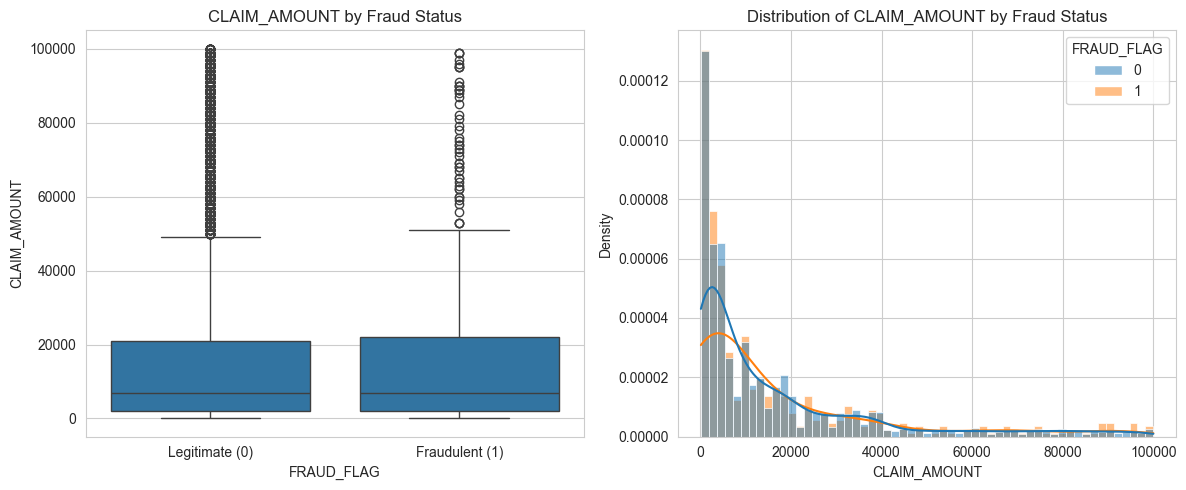

In [29]:
# Question 1a: Is the CLAIM_AMOUNT different for fraudulent claims?
print("\n CLAIM_AMOUNT Analysis ")
print("Descriptive Stats for CLAIM_AMOUNT by FRAUD_FLAG:")
print(df_merged.groupby('FRAUD_FLAG')['CLAIM_AMOUNT'].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='FRAUD_FLAG', y='CLAIM_AMOUNT', data=df_merged)
plt.title('CLAIM_AMOUNT by Fraud Status')
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'])

plt.subplot(1, 2, 2)
sns.histplot(data=df_merged, x='CLAIM_AMOUNT', hue='FRAUD_FLAG', kde=True, common_norm=False, stat="density")
plt.title('Distribution of CLAIM_AMOUNT by Fraud Status')
plt.tight_layout()
plt.show()
# What I looked for: Are fraudulent claims typically higher or lower? Is the spread different?

[findings]

Fraudulent claims have a slightly higher mean and 75th percentile claim amount, but their medians are identical to legitimate claims.

The spread (standard deviation and visual inspection of boxplot whiskers/outliers) is very similar, with fraudulent claims showing marginally higher variability.

While there are minor differences in some statistics (mean, 75th percentile), the overall distributions of CLAIM_AMOUNT for fraudulent and legitimate claims are remarkably similar. CLAIM_AMOUNT alone does not appear to be a strong differentiator between fraudulent and legitimate claims in this dataset based on these initial plots.


 TENURE Analysis 
Descriptive Stats for TENURE by FRAUD_FLAG:
             count       mean        std  min   25%   50%   75%    max
FRAUD_FLAG                                                            
0           9497.0  62.995367  32.879599  6.0  34.0  64.0  91.0  119.0
1            503.0  62.089463  33.118854  6.0  34.5  62.0  92.0  119.0


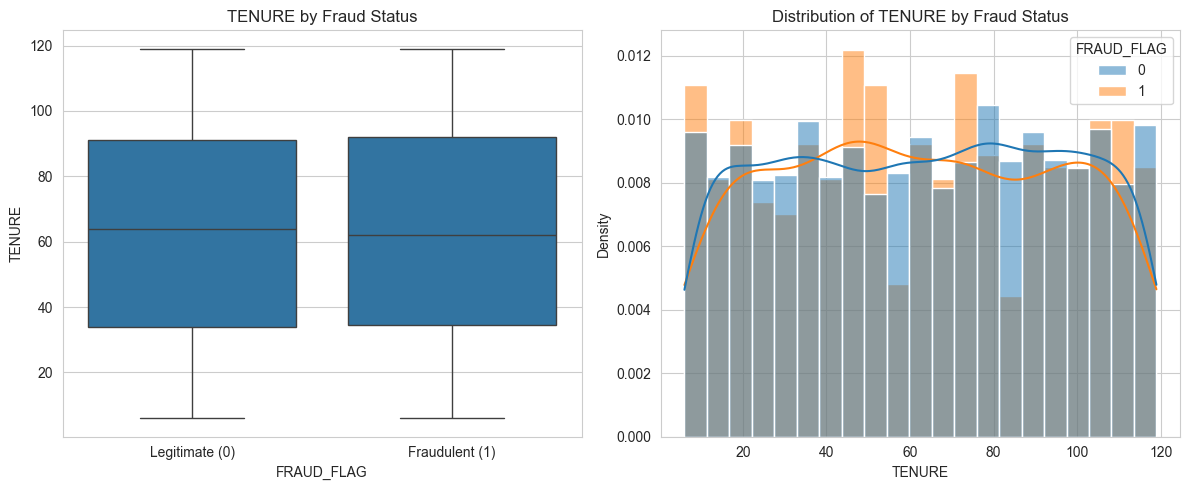

In [30]:

# Question 1b: Does customer TENURE relate to fraud?
print("\n TENURE Analysis ")
print("Descriptive Stats for TENURE by FRAUD_FLAG:")
print(df_merged.groupby('FRAUD_FLAG')['TENURE'].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='FRAUD_FLAG', y='TENURE', data=df_merged)
plt.title('TENURE by Fraud Status')
plt.xticks([0, 1], ['Legitimate (0)', 'Fraudulent (1)'])

plt.subplot(1, 2, 2)
sns.histplot(data=df_merged, x='TENURE', hue='FRAUD_FLAG', kde=True, common_norm=False, stat="density")
plt.title('Distribution of TENURE by Fraud Status')
plt.tight_layout()
plt.show()
# What I looked for: Are newer or older customers more likely to commit fraud?

[findings]

Based on these visuals and statistics, customer TENURE shows very little distinct relationship with fraud. The distributions are extremely similar.

There is no clear indication that significantly newer or older customers are more likely to commit fraud. The tenure profiles for fraudulent and legitimate claims are largely overlapping. The minor differences observed in medians or means are too small to suggest a strong pattern.

 2. Are certain categories more associated with fraud?

Fraud Rate by INCIDENT_SEVERITY:
 INCIDENT_SEVERITY
Total Loss    0.051917
Minor Loss    0.050714
Major Loss    0.048236
Name: FRAUD_FLAG, dtype: float64

more detail including counts:
Proportions
 FRAUD_FLAG                0         1
INCIDENT_SEVERITY                    
Major Loss         0.951764  0.048236
Minor Loss         0.949286  0.050714
Total Loss         0.948083  0.051917


Counts
 FRAUD_FLAG            0    1
INCIDENT_SEVERITY           
Major Loss         3157  160
Minor Loss         3126  167
Total Loss         3214  176




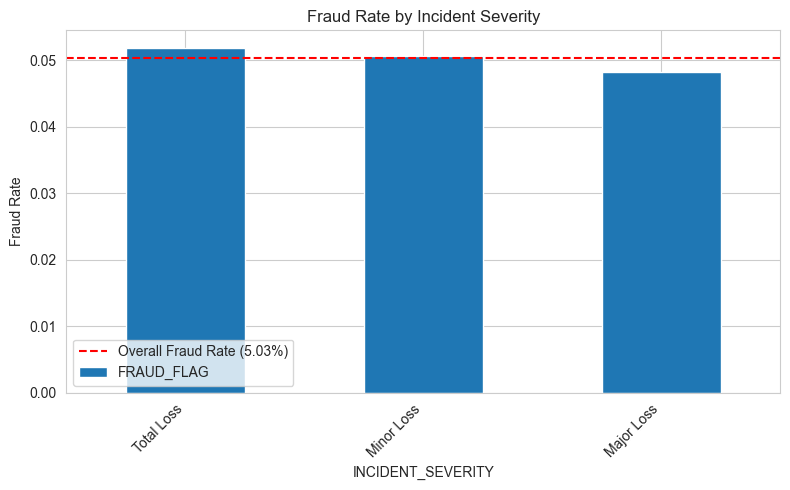

In [31]:
# Question 2a: Does INCIDENT_SEVERITY correlate with fraud?
# Calculate fraud rate per category
incident_severity_fraud_rate = df_merged.groupby('INCIDENT_SEVERITY')['FRAUD_FLAG'].mean().sort_values(ascending=False)
print("Fraud Rate by INCIDENT_SEVERITY:\n", incident_severity_fraud_rate)

print("\nmore detail including counts:")
print("Proportions\n", pd.crosstab(df_merged['INCIDENT_SEVERITY'], df_merged['FRAUD_FLAG'], normalize='index')) 
print("\n")
print("Counts\n", pd.crosstab(df_merged['INCIDENT_SEVERITY'], df_merged['FRAUD_FLAG']))
print("\n")
plt.figure(figsize=(8, 5))
incident_severity_fraud_rate.plot(kind='bar')
plt.title('Fraud Rate by Incident Severity')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45, ha='right')
plt.axhline(df_merged['FRAUD_FLAG'].mean(), color='r', linestyle='--', label=f'Overall Fraud Rate ({df_merged["FRAUD_FLAG"].mean():.2%})')
plt.legend()
plt.tight_layout()
plt.show()
# What I look for: Do certain severities have a much higher fraud rate?

[findings]

While there are minor variations, INCIDENT_SEVERITY does not show a strong correlation with fraud; the fraud rates across different severities are quite similar to each other and to the overall fraud rate.

In addition, certain severities do not have a much higher fraud rate. "Total Loss" has a slightly higher rate and "Major Loss" a slightly lower one, but the differences are minimal.


 INSURANCE_TYPE Analysis 
Fraud Rate by INSURANCE_TYPE:
 INSURANCE_TYPE
Motor       0.054003
Travel      0.052695
Health      0.050296
Mobile      0.049645
Property    0.049645
Life        0.045779
Name: FRAUD_FLAG, dtype: float64


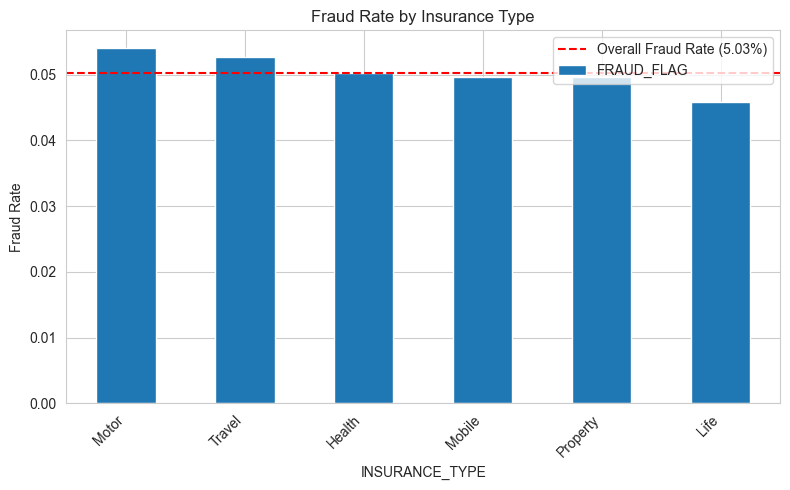

In [32]:

# Question 2b: How about INSURANCE_TYPE?
print("\n INSURANCE_TYPE Analysis ")
insurance_type_fraud_rate = df_merged.groupby('INSURANCE_TYPE')['FRAUD_FLAG'].mean().sort_values(ascending=False)
print("Fraud Rate by INSURANCE_TYPE:\n", insurance_type_fraud_rate)

plt.figure(figsize=(8, 5))
insurance_type_fraud_rate.plot(kind='bar')
plt.title('Fraud Rate by Insurance Type')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45, ha='right')
plt.axhline(df_merged['FRAUD_FLAG'].mean(), color='r', linestyle='--', label=f'Overall Fraud Rate ({df_merged["FRAUD_FLAG"].mean():.2%})')
plt.legend()
plt.tight_layout()
plt.show()

[findings]

INSURANCE_TYPE shows some variation in fraud rates. "Life" insurance has a noticeably lower fraud rate, while "Motor" and "Travel" have slightly higher rates than average. Other types are very close to the overall average.

3. What about time-related aspects?

In [33]:
def plot_numerical_vs_fraud(df, column_name, figsize=(12,5)):
    """Plots a numerical column's distribution against FRAUD_FLAG."""
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found.")
        return
    if df[column_name].isnull().all():
        print(f"Column '{column_name}' is all NaN. Skipping plot.")
        return

    print(f"\n Analysis for: {column_name} ")
    print(df.groupby('FRAUD_FLAG')[column_name].agg(['mean', 'median', 'std', 'min', 'max']))

    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column_name, hue='FRAUD_FLAG', kde=True, stat="density", common_norm=False)
    plt.title(f'Distribution of {column_name} by Fraud Flag')
    plt.xticks([0,1], ['Legit', 'Fraud'])


    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='FRAUD_FLAG', y=column_name)
    plt.title(f'Boxplot of {column_name} by Fraud Flag')
    plt.xticks([0,1], ['Legit', 'Fraud'])

    plt.tight_layout()
    plt.show()


 DAYS_POLICY_TO_LOSS Analysis 

 Analysis for: DAYS_POLICY_TO_LOSS 
                   mean  median          std  min   max
FRAUD_FLAG                                             
0           2095.226071  2094.0  1029.359444  110  4026
1           2120.091451  2168.0  1033.266776  147  3994


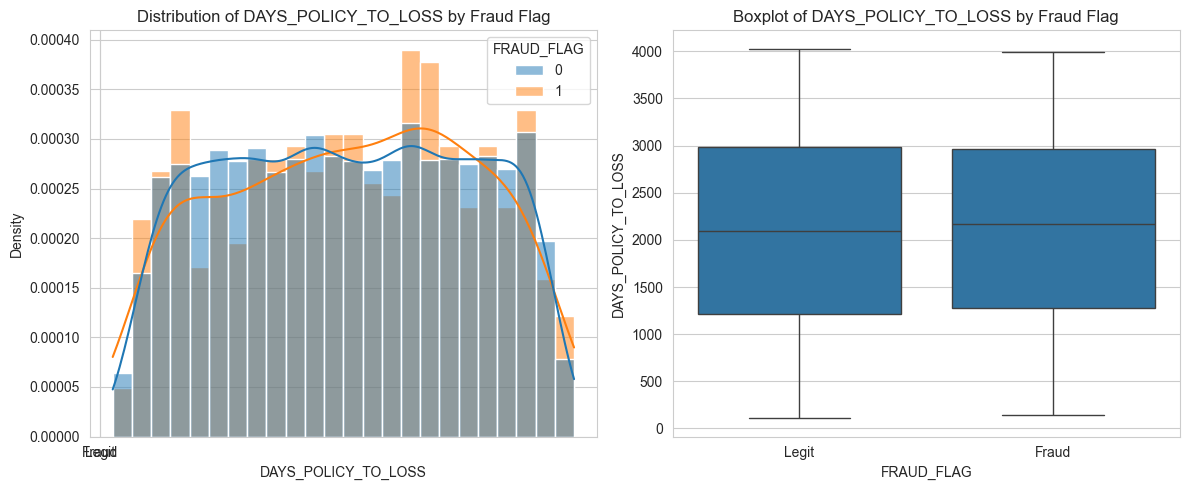

In [34]:
# Question 3a: How long after policy start does a loss occur, and does it relate to fraud?
if all(col in df_merged.columns for col in ['LOSS_DT', 'POLICY_EFF_DT']):
    df_merged['DAYS_POLICY_TO_LOSS'] = (df_merged['LOSS_DT'] - df_merged['POLICY_EFF_DT']).dt.days
    print("\n DAYS_POLICY_TO_LOSS Analysis ")
    # Handle potential negative values if data errors exist or if loss can precede policy effective date
    df_merged.loc[df_merged['DAYS_POLICY_TO_LOSS'] < 0, 'DAYS_POLICY_TO_LOSS'] = 0 

    plot_numerical_vs_fraud(df_merged.dropna(subset=['DAYS_POLICY_TO_LOSS']), 'DAYS_POLICY_TO_LOSS') # Use prior helper or adapt
    # What I look for: Are very new policies more prone to fraudulent claims?

[findings]

Losses occur across a wide range of time after policy start for both fraudulent and legitimate claims. Fraudulent claims tend to occur with a slightly longer duration after policy start on average (higher mean and median) compared to legitimate claims.

Based on these plots, very new policies do not appear to be disproportionately prone to fraudulent claims. The fraudulent claims distribution does not show a spike at the lowest end of DAYS_POLICY_TO_LOSS. In fact, the minimum days for a fraudulent claim is higher than for a legitimate one, and the overall distribution for fraud is slightly shifted towards longer durations.


 DAYS_LOSS_TO_REPORT Analysis 

 Analysis for: DAYS_LOSS_TO_REPORT 
                mean  median       std  min  max
FRAUD_FLAG                                      
0           3.219122     3.0  1.965451    0    5
1           3.073559     3.0  1.991155    0    5


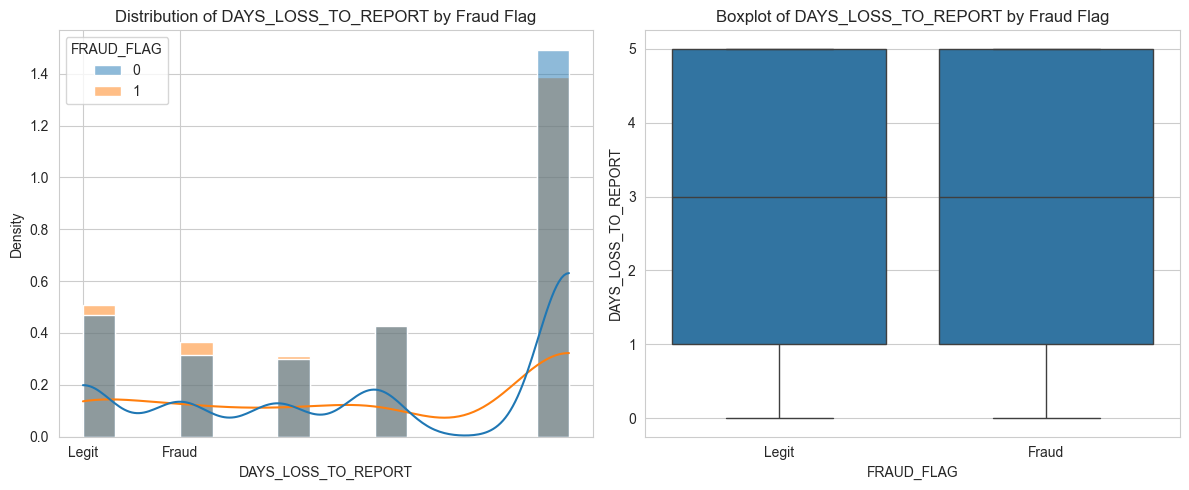

In [35]:
# Question 3b: How long between loss and reporting, and its relation to fraud?
if all(col in df_merged.columns for col in ['REPORT_DT', 'LOSS_DT']):
    df_merged['DAYS_LOSS_TO_REPORT'] = (df_merged['REPORT_DT'] - df_merged['LOSS_DT']).dt.days
    print("\n DAYS_LOSS_TO_REPORT Analysis ")
    df_merged.loc[df_merged['DAYS_LOSS_TO_REPORT'] < 0, 'DAYS_LOSS_TO_REPORT'] = 0 

    plot_numerical_vs_fraud(df_merged.dropna(subset=['DAYS_LOSS_TO_REPORT']), 'DAYS_LOSS_TO_REPORT')
    # What I look for: Are claims reported very late (or very quickly) more suspicious?


[findings]


The time between loss and reporting is very short, typically between 0 and 5 days for almost all claims. Fraudulent claims have a slightly lower mean reporting time than legitimate claims, but the medians are identical, and the overall distributions are very similar.

From these plots I don't see a clear sign that claims that are reported very late (or very soon) are significantly more suspicious than others. While fraudulent claims had a very slightly lower mean, the distributions overlap quite a bit, and the boxplots show identical distributions. The subtle differences in the histogram (i.e., slightly lower fraud proportion at 0 days, and slight higher proportion at 5 days) are not different enough to produce a solid conclusion without needing additional statistical testing or disaggregation of data (if possible).

4. Do some AGENTS or VENDORS have higher fraud rates?

In [36]:
# Question 4a: Agent Analysis
agent_col = 'AGENT_ID'
if agent_col in df_merged.columns:
    print(f"\n {agent_col} Analysis ")
    agent_summary = df_merged.groupby(agent_col)['FRAUD_FLAG'].agg(['mean', 'count'])
    agent_summary.rename(columns={'mean': 'Fraud Rate', 'count': 'Claims Handled'}, inplace=True)

    # Look at agents with a reasonable number of claims
    min_claims_agent = 10
    significant_agents = agent_summary[agent_summary['Claims Handled'] >= min_claims_agent]

    print(f"\nTop 10 Agents by Fraud Rate (min {min_claims_agent} claims):")
    print(significant_agents.sort_values(by='Fraud Rate', ascending=False).head(10))

    print(f"\nBottom 10 Agents by Fraud Rate (min {min_claims_agent} claims):")
    print(significant_agents.sort_values(by='Fraud Rate', ascending=True).head(10))
    # What I look for: Are there clear outliers among agents?


 AGENT_ID Analysis 

Top 10 Agents by Fraud Rate (min 10 claims):
            Fraud Rate  Claims Handled
AGENT_ID                              
AGENT00576    0.300000              10
AGENT00893    0.300000              10
AGENT00930    0.250000              12
AGENT01007    0.250000              12
AGENT00301    0.230769              13
AGENT00807    0.214286              14
AGENT01125    0.200000              10
AGENT01141    0.200000              10
AGENT00130    0.200000              10
AGENT00190    0.200000              15

Bottom 10 Agents by Fraud Rate (min 10 claims):
            Fraud Rate  Claims Handled
AGENT_ID                              
AGENT00001         0.0              10
AGENT00620         0.0              11
AGENT00622         0.0              12
AGENT00626         0.0              10
AGENT00629         0.0              10
AGENT00630         0.0              12
AGENT00634         0.0              10
AGENT00641         0.0              11
AGENT00643         0.0    

In [37]:
# Question 4b: Vendor Analysis
vendor_col = 'VENDOR_ID'
if vendor_col in df_merged.columns:
    print(f"\n {vendor_col} Analysis ")
    df_vendor_analysis = df_merged[df_merged[vendor_col].notna()].copy() # Analyze only where vendor is present
    if not df_vendor_analysis.empty:
        vendor_summary = df_vendor_analysis.groupby(vendor_col)['FRAUD_FLAG'].agg(['mean', 'count'])
        vendor_summary.rename(columns={'mean': 'Fraud Rate', 'count': 'Claims Involved'}, inplace=True)

        min_claims_vendor = 5
        significant_vendors = vendor_summary[vendor_summary['Claims Involved'] >= min_claims_vendor]

        print(f"\nTop 10 Vendors by Fraud Rate (min {min_claims_vendor} claims):")
        print(significant_vendors.sort_values(by='Fraud Rate', ascending=False).head(10))
    else:
        print("No claims with VENDOR_ID to analyze or df_vendor_analysis is empty.")
    # What i look for: Similar to agents.
    


 VENDOR_ID Analysis 

Top 10 Vendors by Fraud Rate (min 5 claims):
           Fraud Rate  Claims Involved
VENDOR_ID                             
VNDR00434    0.272727               11
VNDR00025    0.250000               16
VNDR00414    0.250000               12
VNDR00447    0.222222                9
VNDR00287    0.190476               21
VNDR00185    0.187500               16
VNDR00307    0.181818               22
VNDR00403    0.176471               17
VNDR00009    0.166667               18
VNDR00179    0.166667               12


[findings on bth Agent and Vendors]

Some agents (e.g. AGENT00576, AGENT00893) and vendors (e.g. VNDR00434, VNDR00025) exhibit much higher fraud rates (20 - 30%) versus the ~5% average, indicating potential outliers that could possibly be strong predictors of fraud. However, these are also entities with relatively few claims (9-22), suggesting we should proceed with caution, if modeling in order to avoid data leakage, while high-fraud agents may continue as the basis of analysis and low-fraud agents as best practice.

 5. What about missing data


=== 5. Missing Data Check ===
                          Missing Count  Missing Percent
ADDRESS_LINE2_vend                 8855            88.55
ADDRESS_LINE2_emp                  8549            85.49
ADDRESS_LINE2                      8505            85.05
CITY_vend                          3287            32.87
VENDOR_ID                          3245            32.45
VENDOR_NAME                        3245            32.45
ADDRESS_LINE1_vend                 3245            32.45
STATE_vend                         3245            32.45
POSTAL_CODE_vend                   3245            32.45
AUTHORITY_CONTACTED                1945            19.45
CUSTOMER_EDUCATION_LEVEL            529             5.29
CITY                                 54             0.54
CITY_emp                             54             0.54
INCIDENT_CITY                        46             0.46


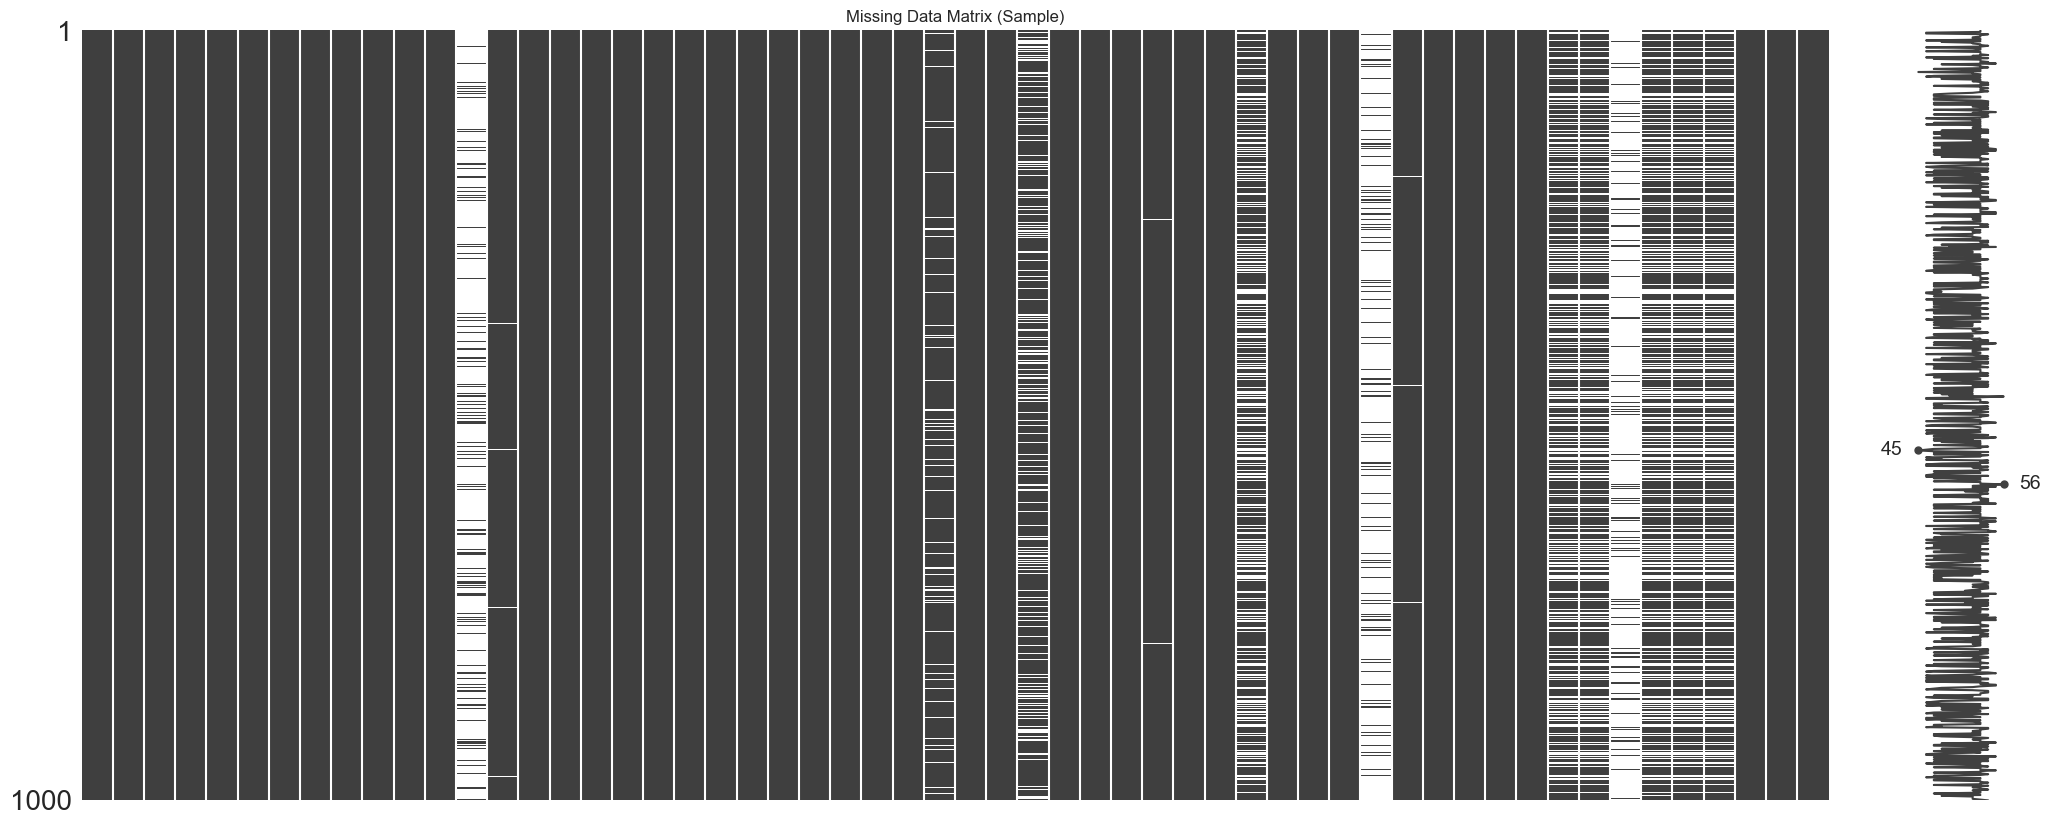

In [38]:
print("\n=== 5. Missing Data Check ===")
missing_summary = df_merged.isnull().sum()
missing_percent = (df_merged.isnull().sum() / len(df_merged)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_summary, 'Missing Percent': missing_percent})
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percent', ascending=False))

try:
    import missingno as msno
    msno.matrix(df_merged.sample(min(1000, len(df_merged)))) # Sample to keep it light
    plt.title("Missing Data Matrix (Sample)")
    plt.show()
except ImportError:
    print("`missingno` library not installed. Skipping matrix plot.")
# What I look for: Which columns have many missing values? Are there patterns?

[findings]

Regarding missing values, ADDRESS_LINE2 fields for customers, employees, and vendors have the highest rates of missing data, while all vendor-specific details are notably absent for about one-third of the claims, and AUTHORITY_CONTACTED shows a moderate level of missingness.

Clear patterns exist in the missing data: ADDRESS_LINE2 fields are consistently sparse, and vendor information typically disappears as a complete block for certain claims, suggesting either no vendor involvement or uncaptured vendor data for roughly a third of incidents; the missingness in AUTHORITY_CONTACTED seems largely independent of these other patterns.